# Criptografando imagens

In [20]:
# * dependencias necessárias *
# numpy, matplotlib, opencv-python

!pip install numpy matplotlib opencv-python

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [3]:
def show_image(img):
  # Mostra Uma imagem
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

In [4]:
def get_pixel(img, altura, largura):
  # Retorna uma string de bits do tipo str. e.g: '1001101000101011011...'
  # Essa string é o conteudo da imagem.
  bit_string = ''
  for y in range(0, altura):
      for x in range(0, largura):
        bitscores = img[y][x]
        for z in range(len(list(bitscores))):
          bz = dec2bin(int(bitscores[z]))
          bz = oitobit(bz)
          bit_string += bz
  return bit_string 

In [5]:
def oitobit(bit_string):
  # Garante que tal string de bits tenha o tamanho de 8. '1001001' -> '01001001'
  bit_string = str(bit_string)
  if len(bit_string) == 8: return bit_string
  return oitobit('0'+bit_string)

In [6]:
def dec2bin(n):
  if n == 0: return 0
  if n == 1: return 1
  return str(dec2bin(n//2)) + str(n%2)

In [7]:
def bitarray2intlist(bit_string):
  # Retorna uma lista de numeros com base em um bit_string
  # A cada 8bits ele transforma em um numero decimal e add na lista. 
  cont = 0
  l1 = ''
  l2 = []
  for e in bit_string:
    l1 += e
    cont +=1
    if cont == 8:
      cont = 0
      l1 = int(l1, 2)
      l2.append(l1)
      l1 = ''
  return l2

In [8]:
def passwd_gen(n):
  # Retorna uma senha gerada aleatoriamente de tamanho n
  from random import randint
  pwd = ''
  for k in range(n):
    pwd += str(randint(0,1))
  return pwd


In [9]:
def image_builder(altura, largura, intarray):
  # Retorna uma imagem com o conteudo intarray
  return np.ndarray(shape=(altura, largura, 3), dtype=int, buffer=np.array(list(intarray)) )

In [10]:
def funcao_xor(msg, pwd):
  # Essa funcao pega duas bit_string e aplica o XOR nelas
  # Retorna esse novo bit_string
  saida = ''
  for i in range(len(msg)):
    if (int(msg[i]) or int(pwd[i])) and not (int(msg[i]) == int(pwd[i])):
      saida += '1'
    else:
      saida += '0'
  return saida

In [11]:
def funcao_and(msg, pwd):
  # Essa funcao pega duas bit_string e aplica o AND nelas
  # Retorna esse novo bit_string
  saida = ''
  for i in range(len(msg)):
    if (int(msg[i]) and int(pwd[i])):
      saida += '1'
    else:
      saida += '0'
  return saida


In [12]:
def funcao_or(msg, pwd):
  # Essa funcao pega duas bit_string e aplica o OR nelas
  # Retorna esse novo bit_string
  saida = ''
  for i in range(len(msg)):
    if (int(msg[i]) or int(pwd[i])):
      saida += '1'
    else:
      saida += '0'
  return saida

In [24]:
def input_img(image):
  # Retorna as dimencoes da imagem e um objeto que é a sua imagem(img)
  img = cv2.imread(image)
  print("Dimensões da imagem: " + str(img.shape))
  altura, largura, canais = img.shape
  print(f'Largura: {largura}')
  print(f'Altura: {altura}')
  print(f'Canais de cores: {canais}')
  return img, altura, largura, canais


In [30]:
def criptografar(image, altura, largura, operador, pwd=None):
  # Processo para criptografar uma imagem. 
  # operador: funcao_and, funcao_or, funcao_xor
  # Para o 'operador' funcao_xor esta funcao serve para criptografar e descriptografar
  # funcao_xor --> f(x) = y  -->  f**-1(y) = x
    
  image_conteudo = get_pixel(image, altura, largura)
  if pwd == None:
    pwd = passwd_gen(len(image_conteudo))
  cripxor = operador(image_conteudo, pwd)
  cores_conteudo = bitarray2intlist(cripxor)
  return image_builder(altura, largura, cores_conteudo), pwd

In [15]:
def main():
  image_name = input('Nome da imagem com extensão: ')
  image, altura, largura, _ = input_img(image_name)
  show_image(image)

  a, _ = des_criptografar(image, altura, largura, funcao_and)
  show_image(a)

  a, _ = des_criptografar(image, altura, largura, funcao_or)
  show_image(a)

  a, pwd = des_criptografar(image, altura, largura, funcao_xor)
  show_image(a)

  #b, _ = des_criptografar(a, altura, largura, funcao_xor, pwd)
  #show_image(b)

## Imagem original

Nome da imagem com extensão: pombo.jpg
Dimensões da imagem: (450, 647, 3)
Largura: 647
Altura: 450
Canais de cores: 3


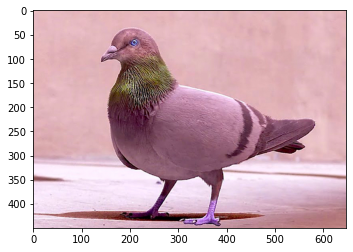

In [32]:
#main()
image_name = input('Nome da imagem com extensão: ') # entrando com a imagem
image, altura, largura, _ = input_img(image_name) # carregando a imagem e pegando suas dimensões
show_image(image) # mostrando a imagem

my_password = passwd_gen(len(get_pixel(image, altura, largura))) # criando uma chave com o tamanho da imagem

## Operação AND

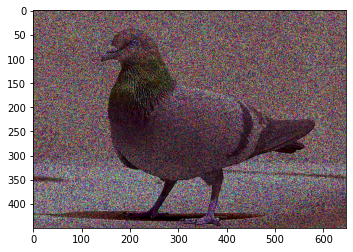

In [33]:
a, _ = criptografar(image, altura, largura, funcao_and, my_password)
show_image(a)

## Operação OR

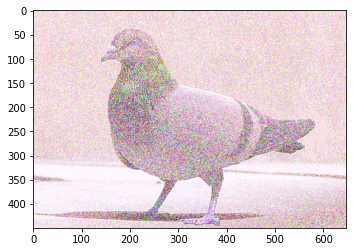

In [34]:
a, _ = criptografar(image, altura, largura, funcao_or, my_password)
show_image(a)

## Operação XOR

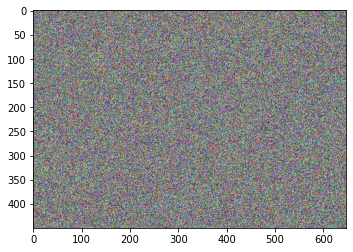

In [35]:
a, pwd = criptografar(image, altura, largura, funcao_xor, my_password)
show_image(a)